<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab: Pivot Charts**


Estimated time needed: **30** minutes


## Introduction
In this lab, you will learn how to use pivot charts for data analysis. Pivot charts play a crucial role in data analytics by enabling quick and intuitive exploration of multidimensional datasets. They allow analysts to summarize and visualize complex data relationships across multiple variables, facilitating insights that might be obscured in raw data tables. By dynamically aggregating and pivoting data, these charts provide a comprehensive view of trends, patterns, and correlations, empowering decision-makers to identify key factors influencing outcomes. Pivot charts enhance data-driven decision-making processes by simplifying complex data into actionable visual representations, thereby accelerating understanding and fostering informed strategies in diverse fields such as business analytics, market research, and scientific studies.


## Objectives

After completing this lab you will be able to:

 - Use Pivot charts for data analytics
 - Use different types of charts for different scenarios
 - Make deeper inferences from data based on the pivoted representations


----


## Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.
*   [`sqlite3`](https://docs.python.org/3/library/sqlite3.html) for accessing the database


### Installing Required Libraries

Execute the following code to install the required libraries on the interface


In [ ]:
%pip install pandas seaborn

### Importing Required Libraries

All libraries required for the codes below should be imported here.


In [2]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np


### Download the database
Download the databaset from the cloud server by executing the code statement below.


In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

Load the database and read the data table as a Pandas dataframe for further usage, by executing the following code.


In [3]:
sqlitefile = 'm4_survey_data.sqlite'
fpfn=os.path.join(os.getcwd(), sqlitefile)
conn = sqlite3.connect(fpfn) # open a database connection
QUERY = """SELECT * FROM master"""
dfmaster = pd.read_sql(QUERY,conn)
# Save this for use below

### Scenario 1: Distribution of Respondents by Career Satisfaction and Job Satisfaction


In the first task, you can plot a distribution of the distribution of the respondents in terms of their Career Satisfaction and Job satisfaction. For this, we need to create a pivot with one of the axis representing unique values of `CareerSat` field, another axis representing `JobSat` values, and the data to be shown under each map to be set as the count of respondents. To achieve this, you can execute the code block shared below.


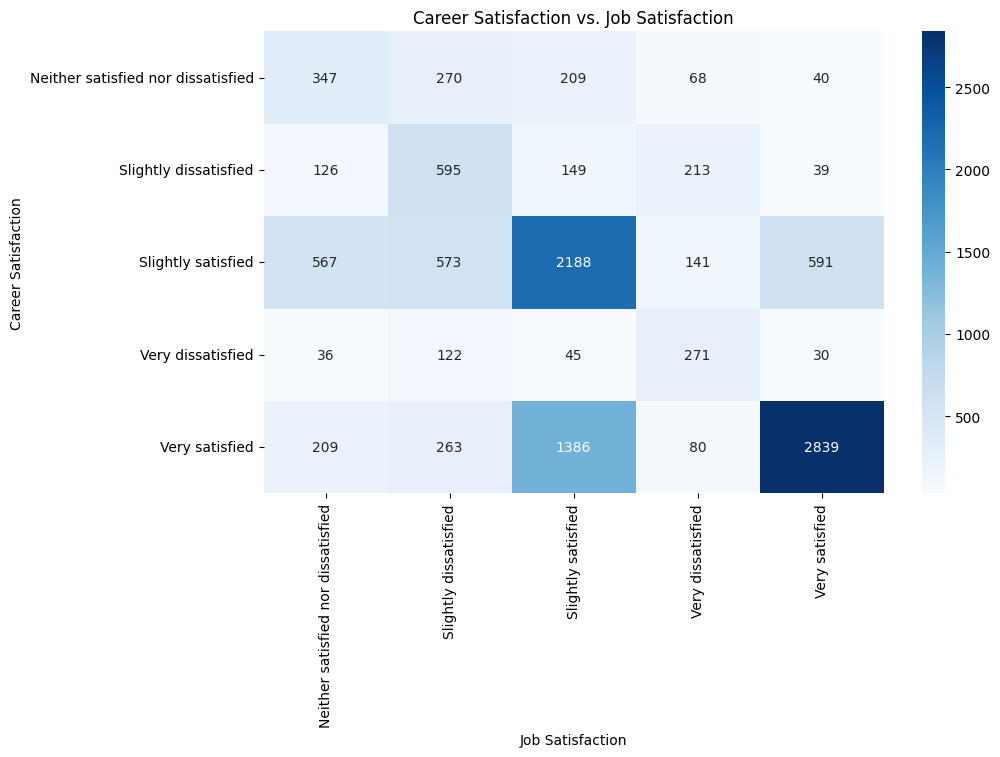

In [4]:
pivot_table = pd.pivot_table(dfmaster, index='CareerSat', columns='JobSat', values='Respondent', aggfunc='count', fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt='g')
plt.title('Career Satisfaction vs. Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Career Satisfaction')
plt.show()

#### Inference:
Using a heatmap to visualize the relationship between career satisfaction and job satisfaction provides a clear overview of satisfaction levels across different dimensions. We can see that people 'Very Satisfied' with their current jobs are also 'Very Satisfied' with their careers.


### Scenario 2: Comparison of Open Source Adoption Across Operating Systems
In this scenario, you can visualize the adoption of Open Sourse systems across different operating systems by the respondents. To create this pivot chart, the `index` parameter, representing the x-axis, can be set as `OpSys`and the `columns` parameter can be set as `OpenSource`. The `values` parameter will be set as `Respondent` with aggregation function as `count`. This graph should be plotted as a grouped bar graph.

As a practice exercise, try to complete the code block below to generate the pivot chart yourself. Upon creation of the pivot chart, you can draw the inferences based on the visible distribution.


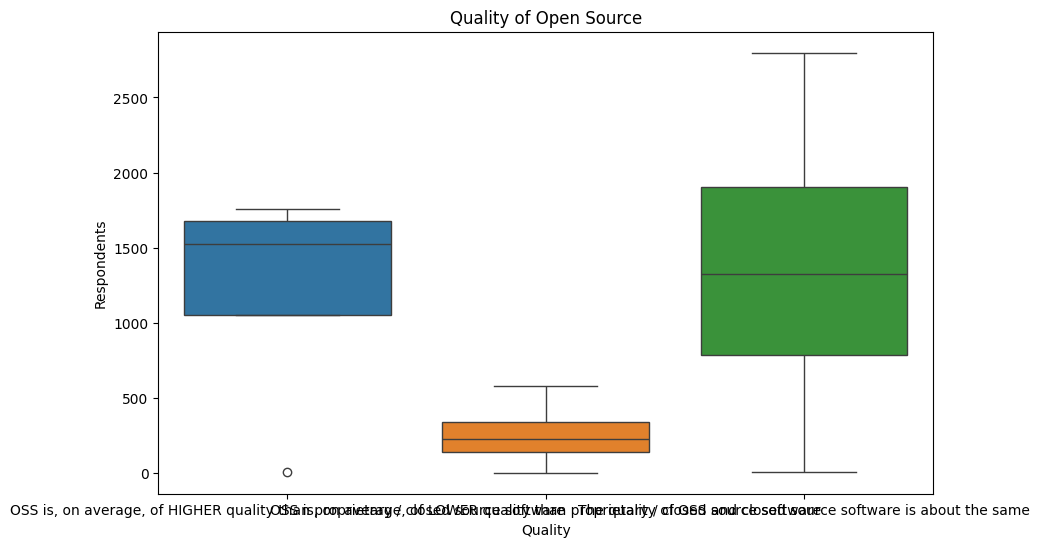

In [5]:
pt = pd.pivot_table(dfmaster,index='OpSys',columns=['OpenSource'],values='Respondent',aggfunc='count',fill_value=0)
# Plotting
plt.figure(figsize=(10,6))
sns.boxplot(pt)
plt.title('Quality of Open Source')
plt.xlabel('Quality')
plt.ylabel('Respondents')
plt.show()

<details><Summary>Click here for the solution</Summary>

```python
pivot_table = pd.pivot_table(dfmaster, index='Opr', columns='OpenSource', values='Respondent', aggfunc='count', fill_value=0)

# Plotting
pivot_table.plot(kind='bar')
plt.title('Open Source Adoption Across Operating Systems')
plt.xlabel('Operating System')
plt.ylabel('Number of Respondents')
plt.legend(title='Comparison with Closed Source')
plt.xticks(rotation=0)
plt.show()
```
</details>


### Scenario 3: Job Satisfaction and Career Aspirations by Employment Status

In this scenario, you can explore a deeper interpretation of the data using Pivot charts. Let us explore how employment status and job satisfaction affects the career aspirations of the respondents. 

For this, you need to create a pivot table with 'Employment' and 'JobSat' fields as index, 'MgrWant' field as columns and 'Respondent' as values with aggregation function as 'count'. Complete the following code block to generate the said pivot chart.

Upon creation of the pivot chart, you can draw the inferences based on the visible distribution.


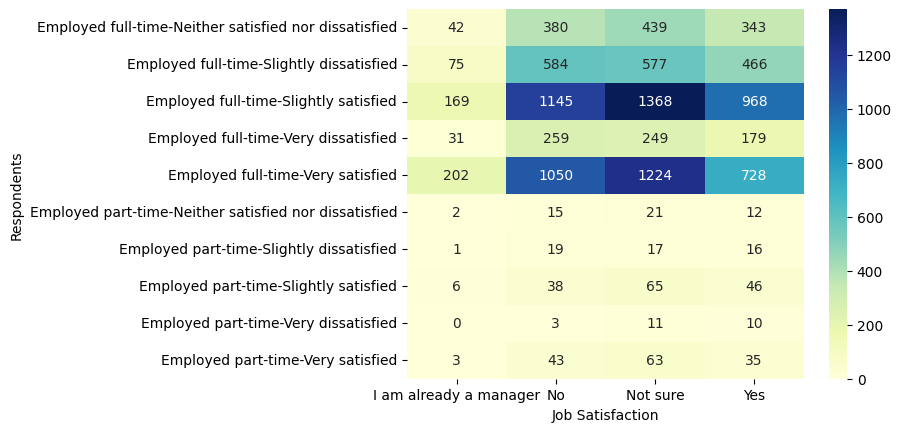

In [7]:
pt = pd.pivot_table(dfmaster, index=['Employment','JobSat'],columns='MgrWant',values='Respondent',aggfunc='count',fill_value=0)

# Plotting - Simple Pivot without specifying x
sns.heatmap(pt, annot=True, cmap='YlGnBu', fmt='g')
plt.xlabel('Job Satisfaction')
plt.ylabel('Respondents')
plt.show()


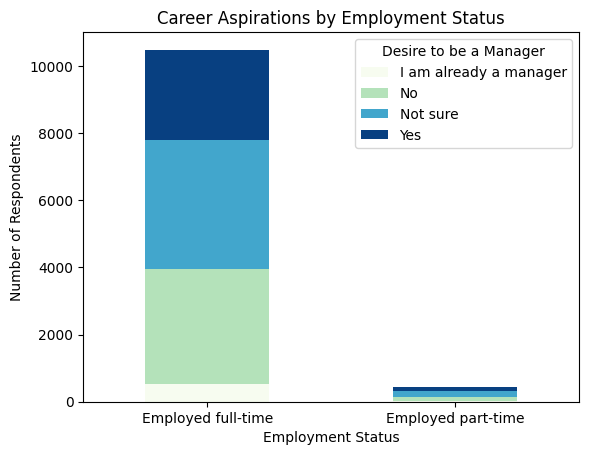

In [8]:
pivot_table = pd.pivot_table(dfmaster, index='Employment', columns='MgrWant', values='Respondent', aggfunc='count', fill_value=0)

# Plotting  Solution
pivot_table.plot(kind='bar', stacked=True, colormap='GnBu')
plt.title('Career Aspirations by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Number of Respondents')
plt.legend(title='Desire to be a Manager')
plt.xticks(rotation=0)
plt.show()

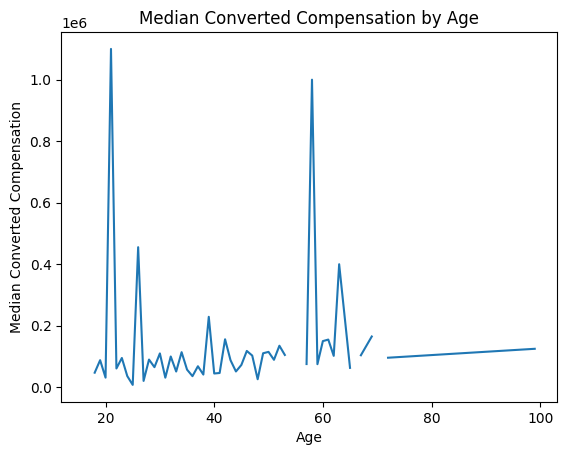

In [9]:
QUERY = """
select Age, ConvertedComp, count(*) as count
from master
group by Age
order by Age
"""
dfq = pd.read_sql_query(QUERY,conn)
dfq['Median'] = 0
dfq = dfq.groupby('Age')['ConvertedComp'].median()
# Plotting
dfq.plot(kind='line', x='Age', y='ConvertedComp')
plt.title("Median Converted Compensation by Age")
plt.xlabel('Age')
plt.ylabel('Median Converted Compensation')
plt.show()


      LanguageWorkedWith  count
0             JavaScript   8687
1               HTML/CSS   7830
2                    SQL   7106
3  Bash/Shell/PowerShell   4642
4                 Python   4542
5                   Java   4506
6                     C#   4288
7             TypeScript   3232
8                    PHP   2913
9                    C++   1946


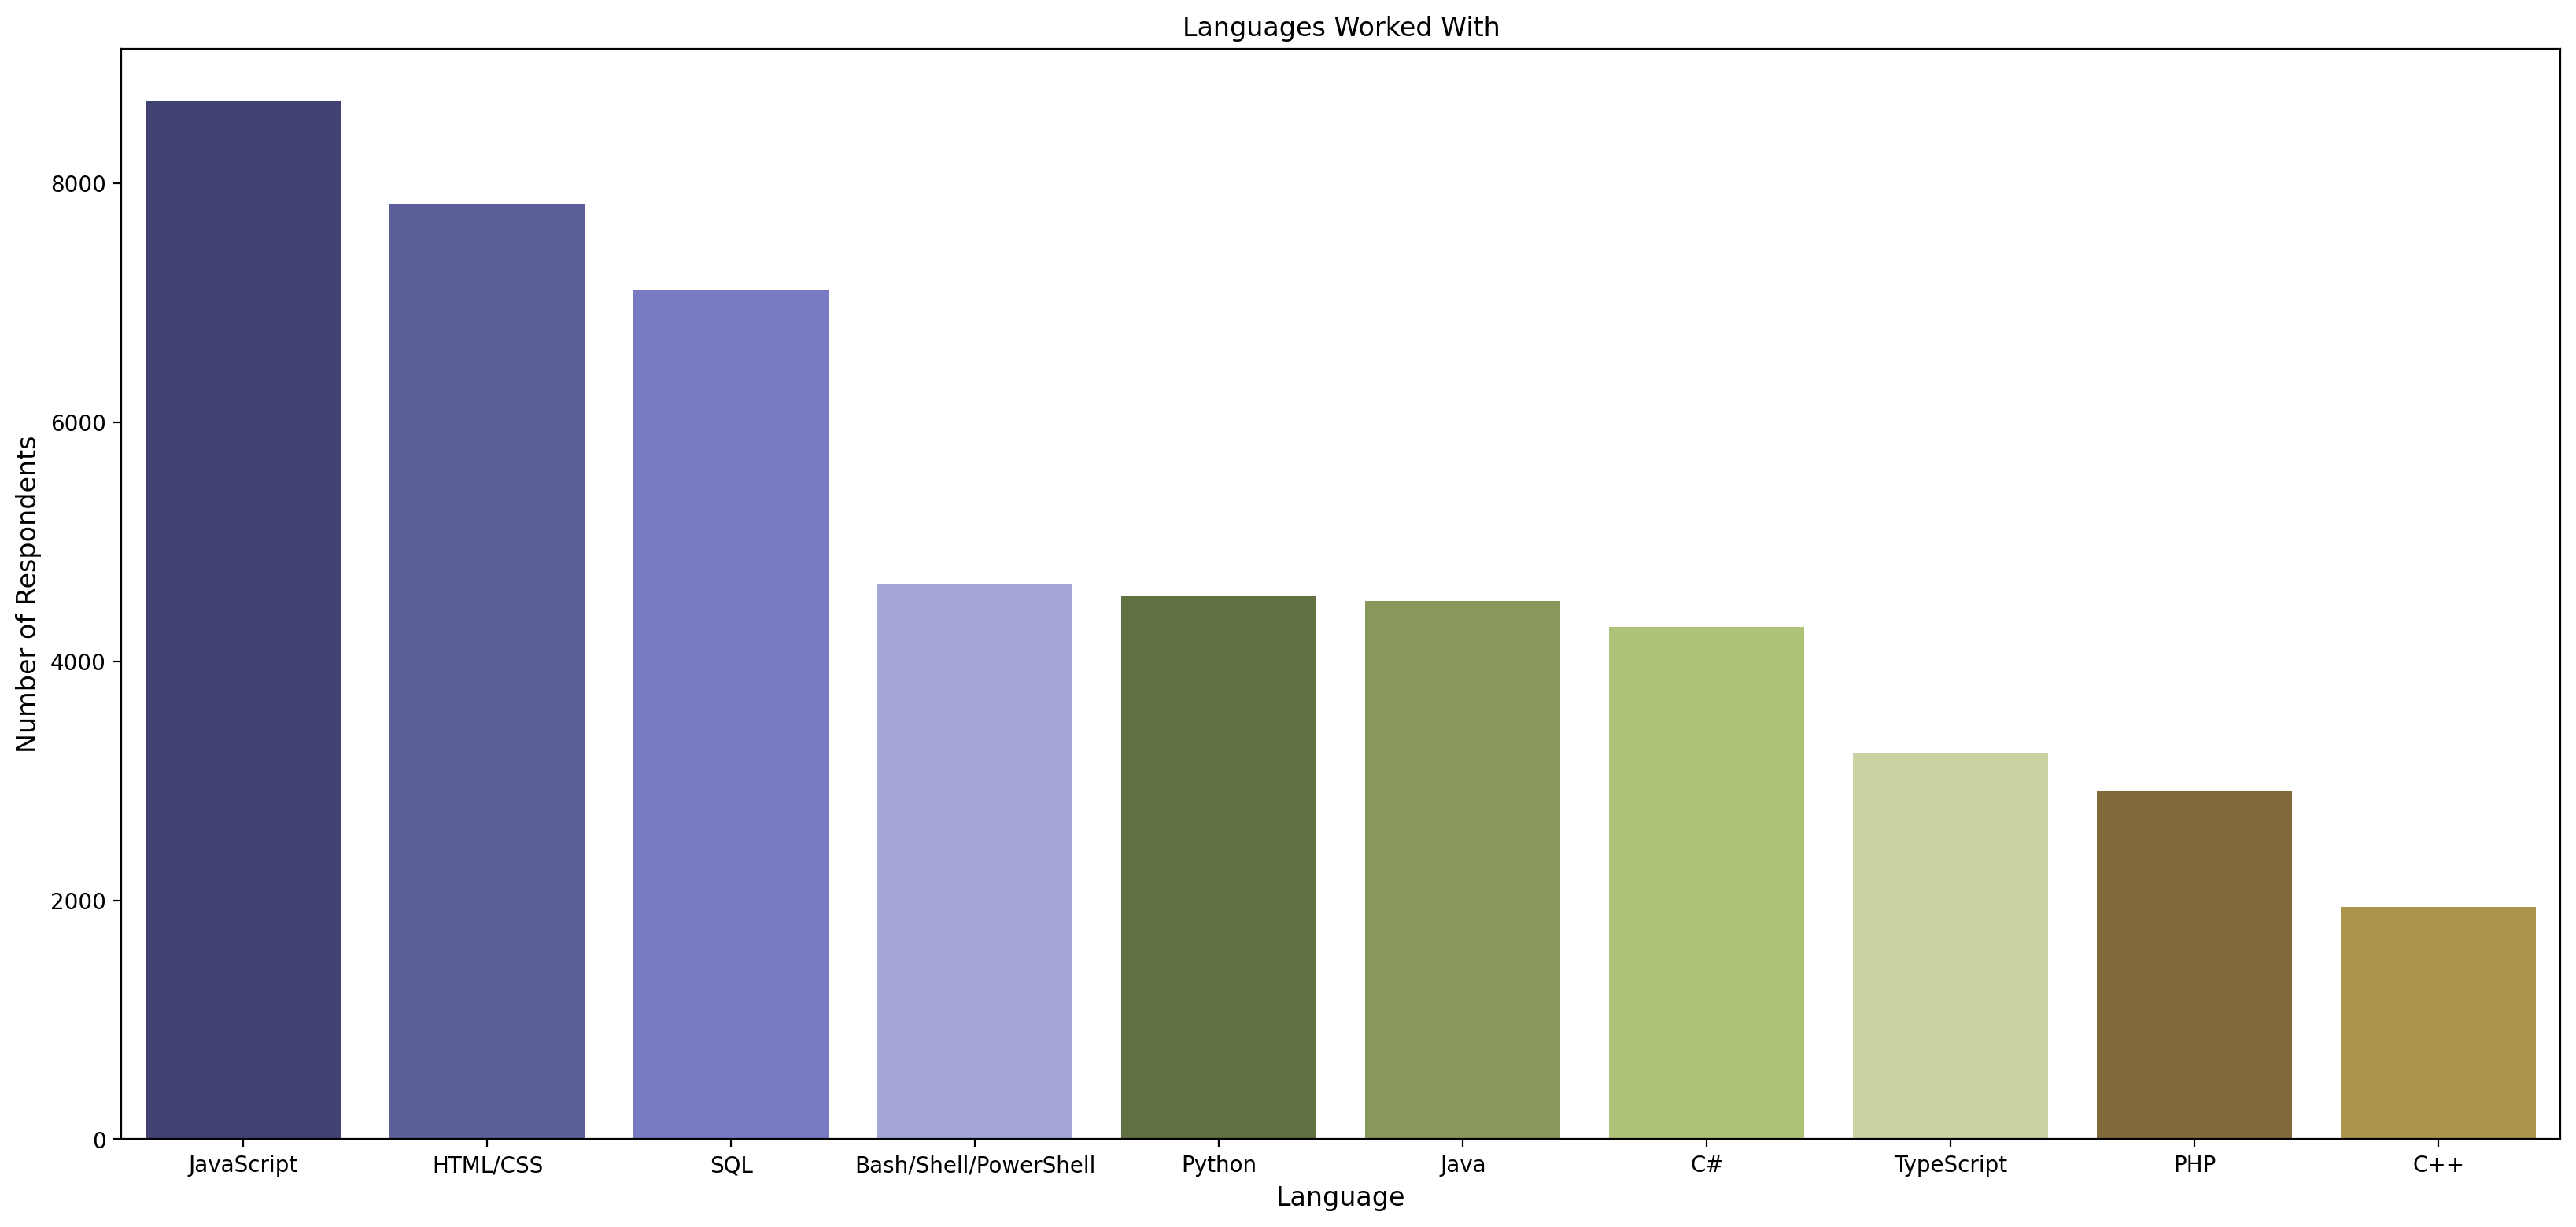

In [11]:
QUERY = """
SELECT LanguageWorkedWith, count(*) as count
FROM LanguageWorkedWith
group by LanguageWorkedWith
order by count desc
"""
df = pd.read_sql_query(QUERY,conn)
dfq = df.head(10)
print(dfq)

# bar chart,having 10 bars
plt.rcParams['figure.dpi'] = 200
plt.figure(figsize=(20,9))
sns.color_palette("husl", 10)
sns.barplot(data=dfq, x='LanguageWorkedWith', y='count',hue='LanguageWorkedWith',palette='tab20b')

plt.title('Languages Worked With',fontsize=12)
plt.ylabel('Number of Respondents',fontsize=12)
plt.xlabel('Language',fontsize=12)
plt.show()


     DatabaseWorkedWith  count
0                 MySQL   5469
1  Microsoft SQL Server   4110


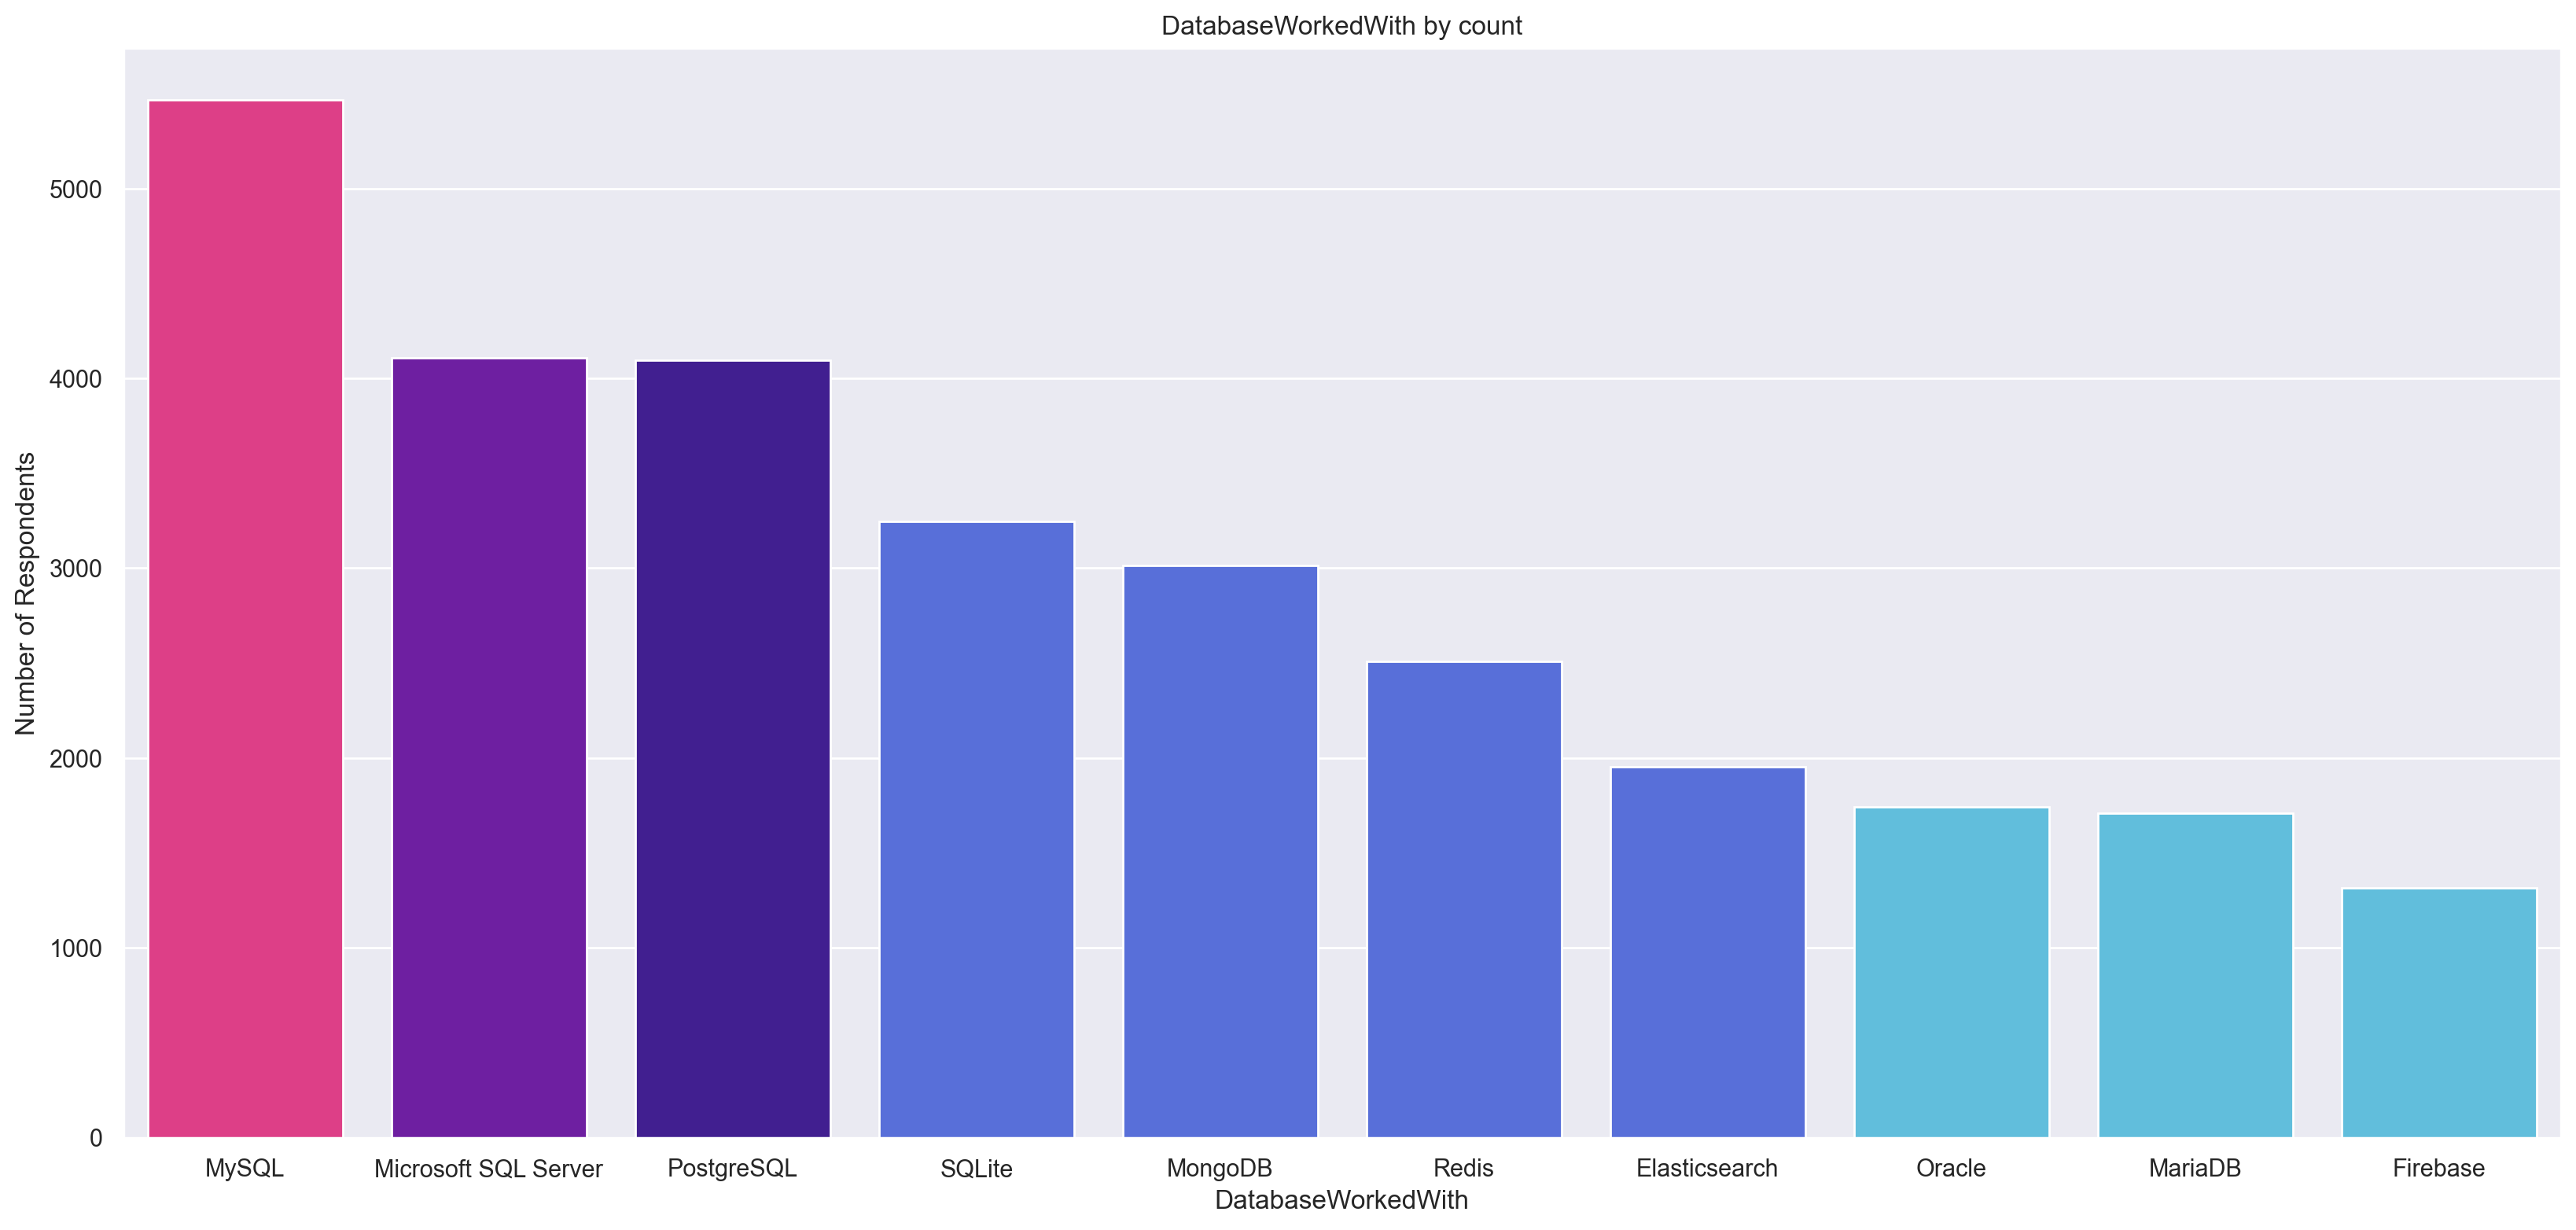

In [7]:
### Time to set up some variables and define doqueryplot like this:
tablename = 'DatabaseWorkedWith'  # the table you wish to describe
xname = 'DatabaseWorkedWith'
yname = 'count'
sns.set()  # return to seaborn sns defaults
colorlist = ["#F72585", "#7209B7", "#3A0CA3", "#4361EE","#4361EE","#4361EE","#4361EE",
             "#4CC9F0",  "#4CC9F0", "#4CC9F0"]
mypalette = colorlist
plt.rcParams['figure.dpi'] = 200
plt.figure(figsize=(20,9))

def doqueryplot():
    # Use float string with parameters, not straight variables
    # to avoid SQL injection attacks
    QUERY = f"select {xname}, count(*) as count FROM {tablename} group by {xname} order by {yname} desc"
    dfp = pd.read_sql_query(QUERY, conn)
    dftop10 = dfp.head(10)
    print(dftop10.head(2))
    # bar chart,having 10 bars
    sns.color_palette("husl", 10)
    sns.barplot(data=dftop10, x=xname, y='count',hue=xname,palette=mypalette)
    plt.title(f'{xname} by {yname}',fontsize=12)
    plt.ylabel('Number of Respondents',fontsize=12)
    plt.xlabel(xname,fontsize=12)
    plt.show()

doqueryplot()


  PlatformWorkedWith  count
0              Linux   5811
1            Windows   5563


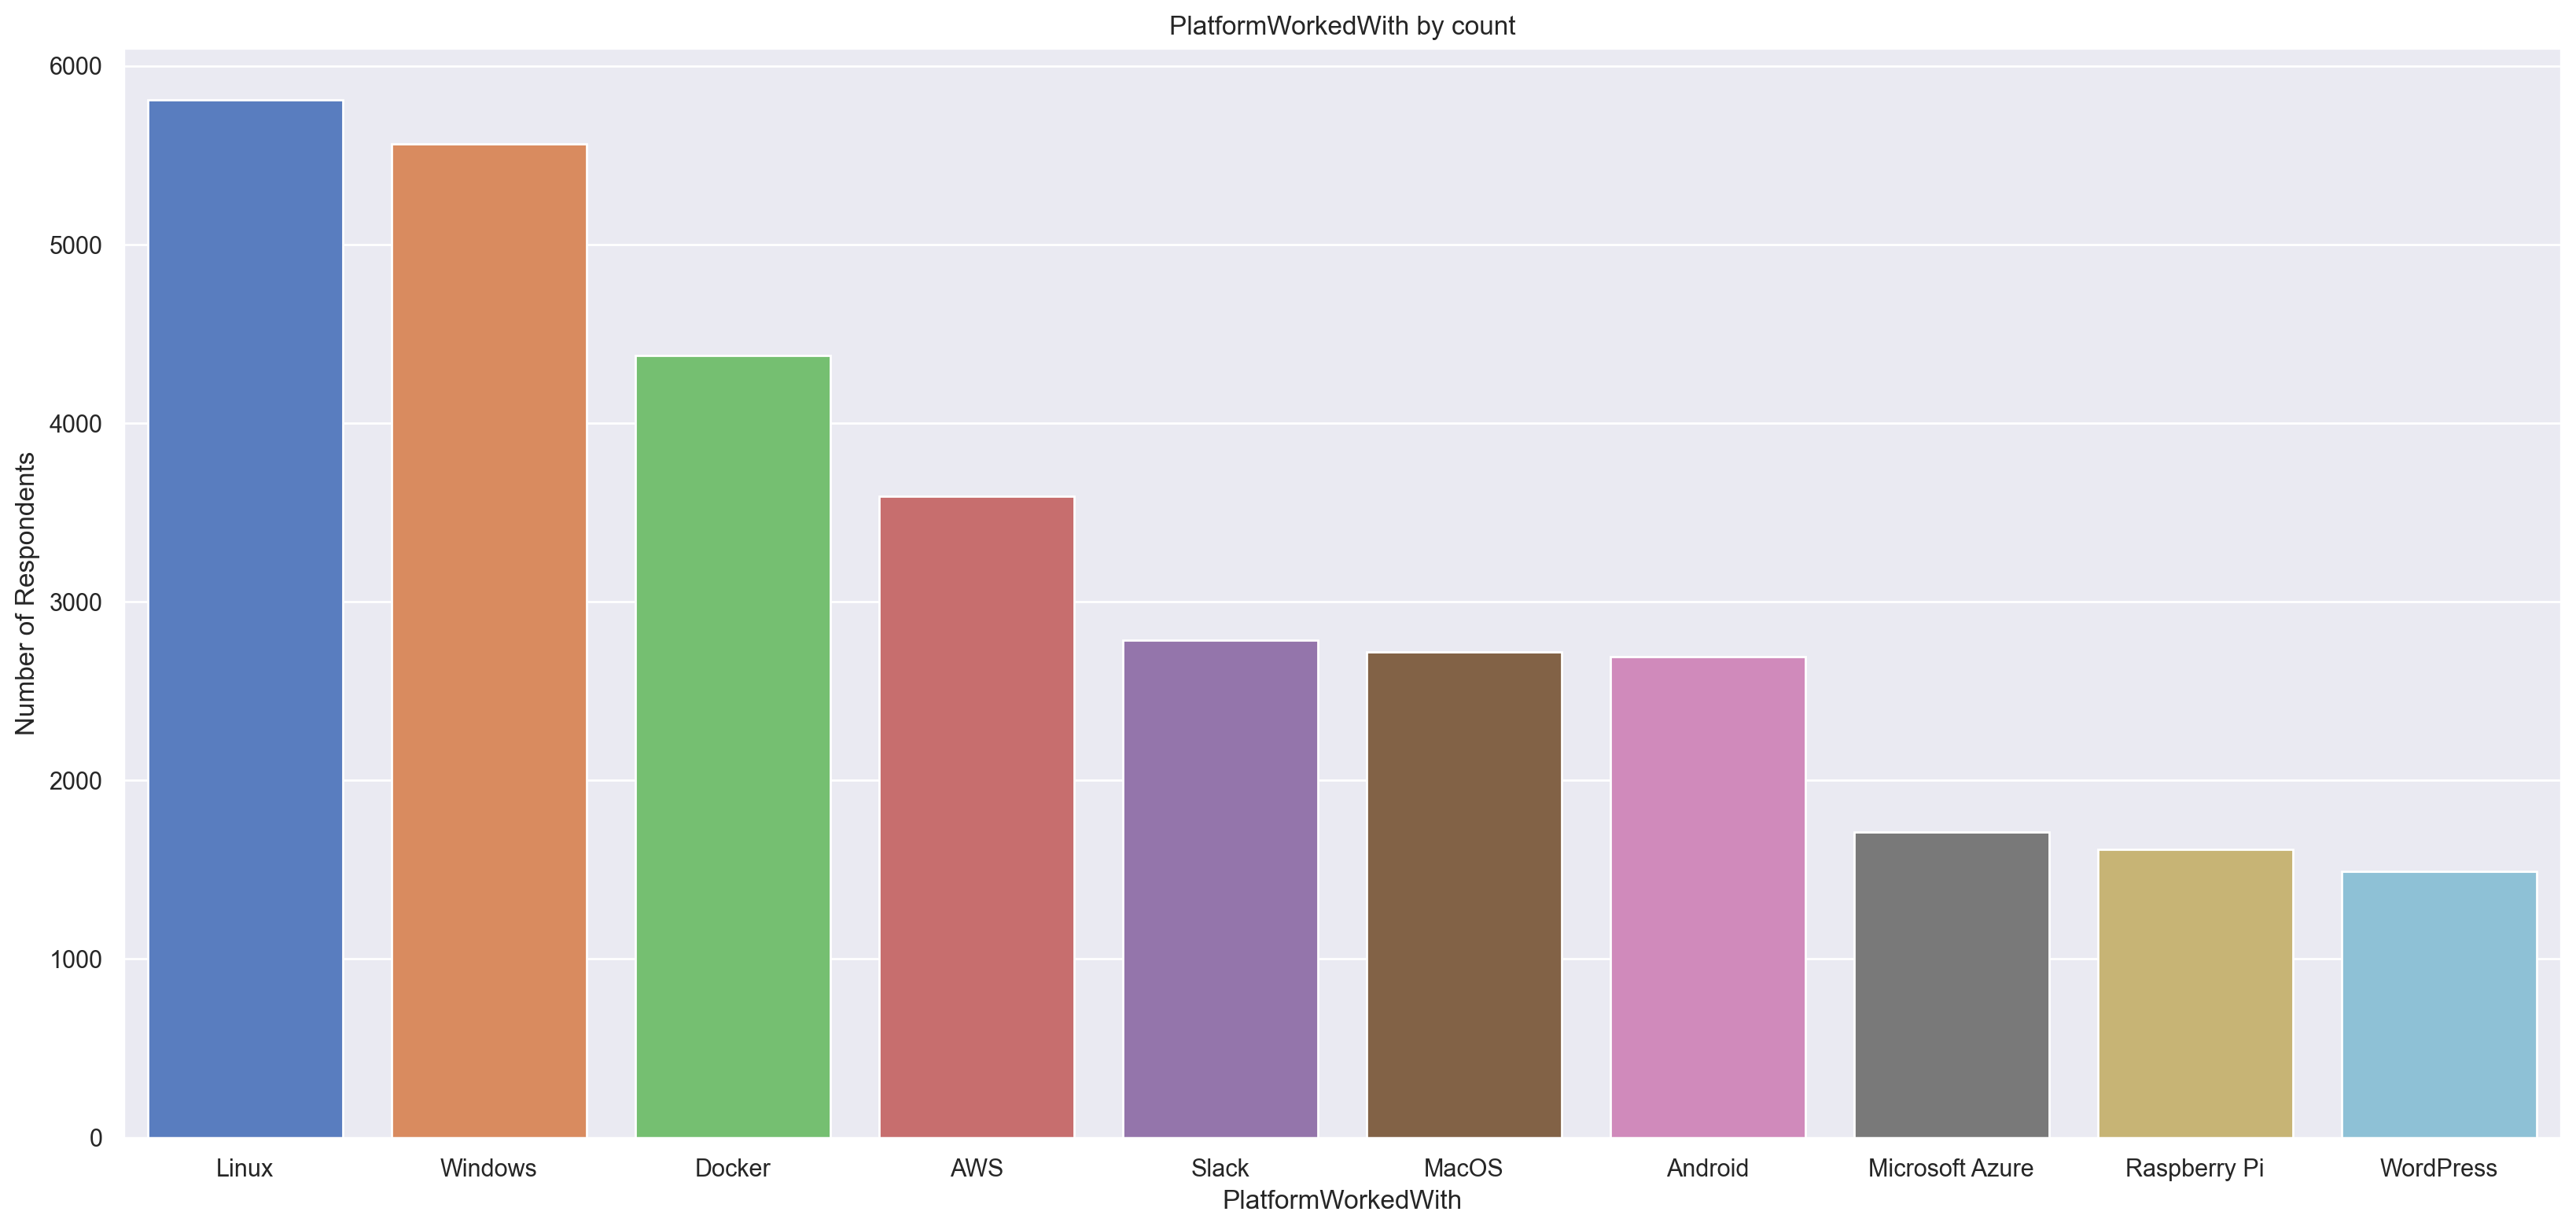

In [15]:
tablename = 'PlatformWorkedWith'  # the table you wish to describe
xname = 'PlatformWorkedWith'
yname = 'count'
sns.set()  # return to seaborn sns defaults
mypalette = 'muted'
plt.rcParams['figure.dpi'] = 200
plt.figure(figsize=(20,9))

doqueryplot()


   WebFrameWorkedWith  count
0              jQuery   4629
1  Angular/Angular.js   3327


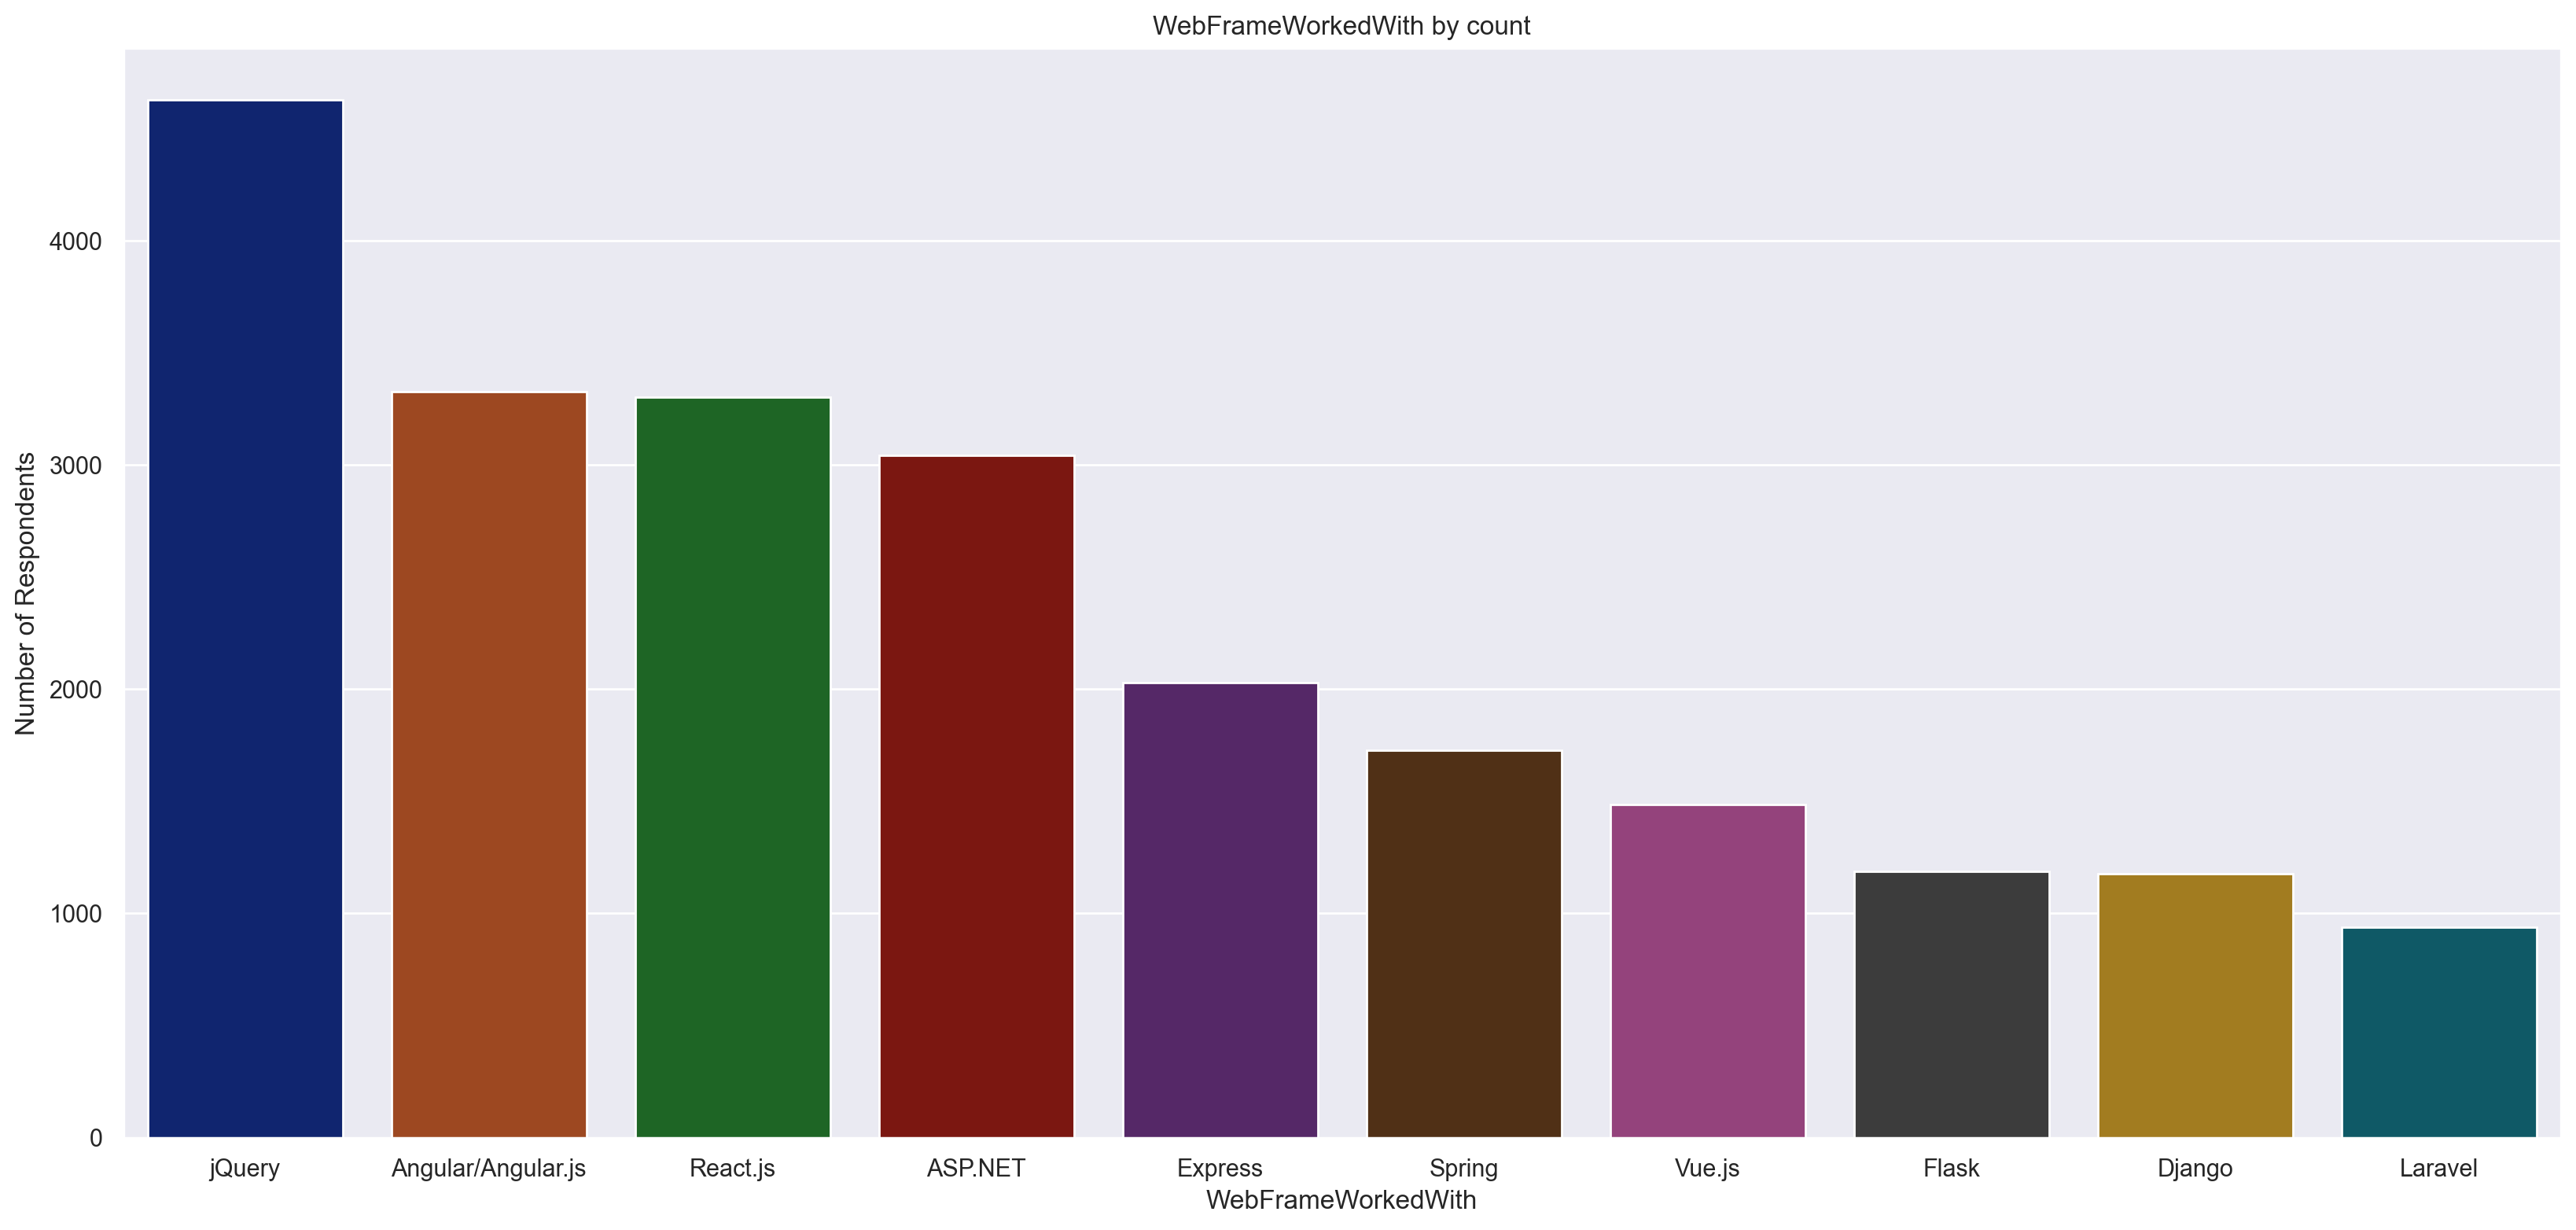

In [17]:
tablename = 'WebFrameWorkedWith'  # the table you wish to describe
xname = 'WebFrameWorkedWith'
yname = 'count'
sns.set()  # return to seaborn sns defaults
mypalette = 'dark'
plt.rcParams['figure.dpi'] = 200
plt.figure(figsize=(20,9))
doqueryplot()


  LanguageDesireNextYear  count
0             JavaScript   6630
1               HTML/CSS   5328


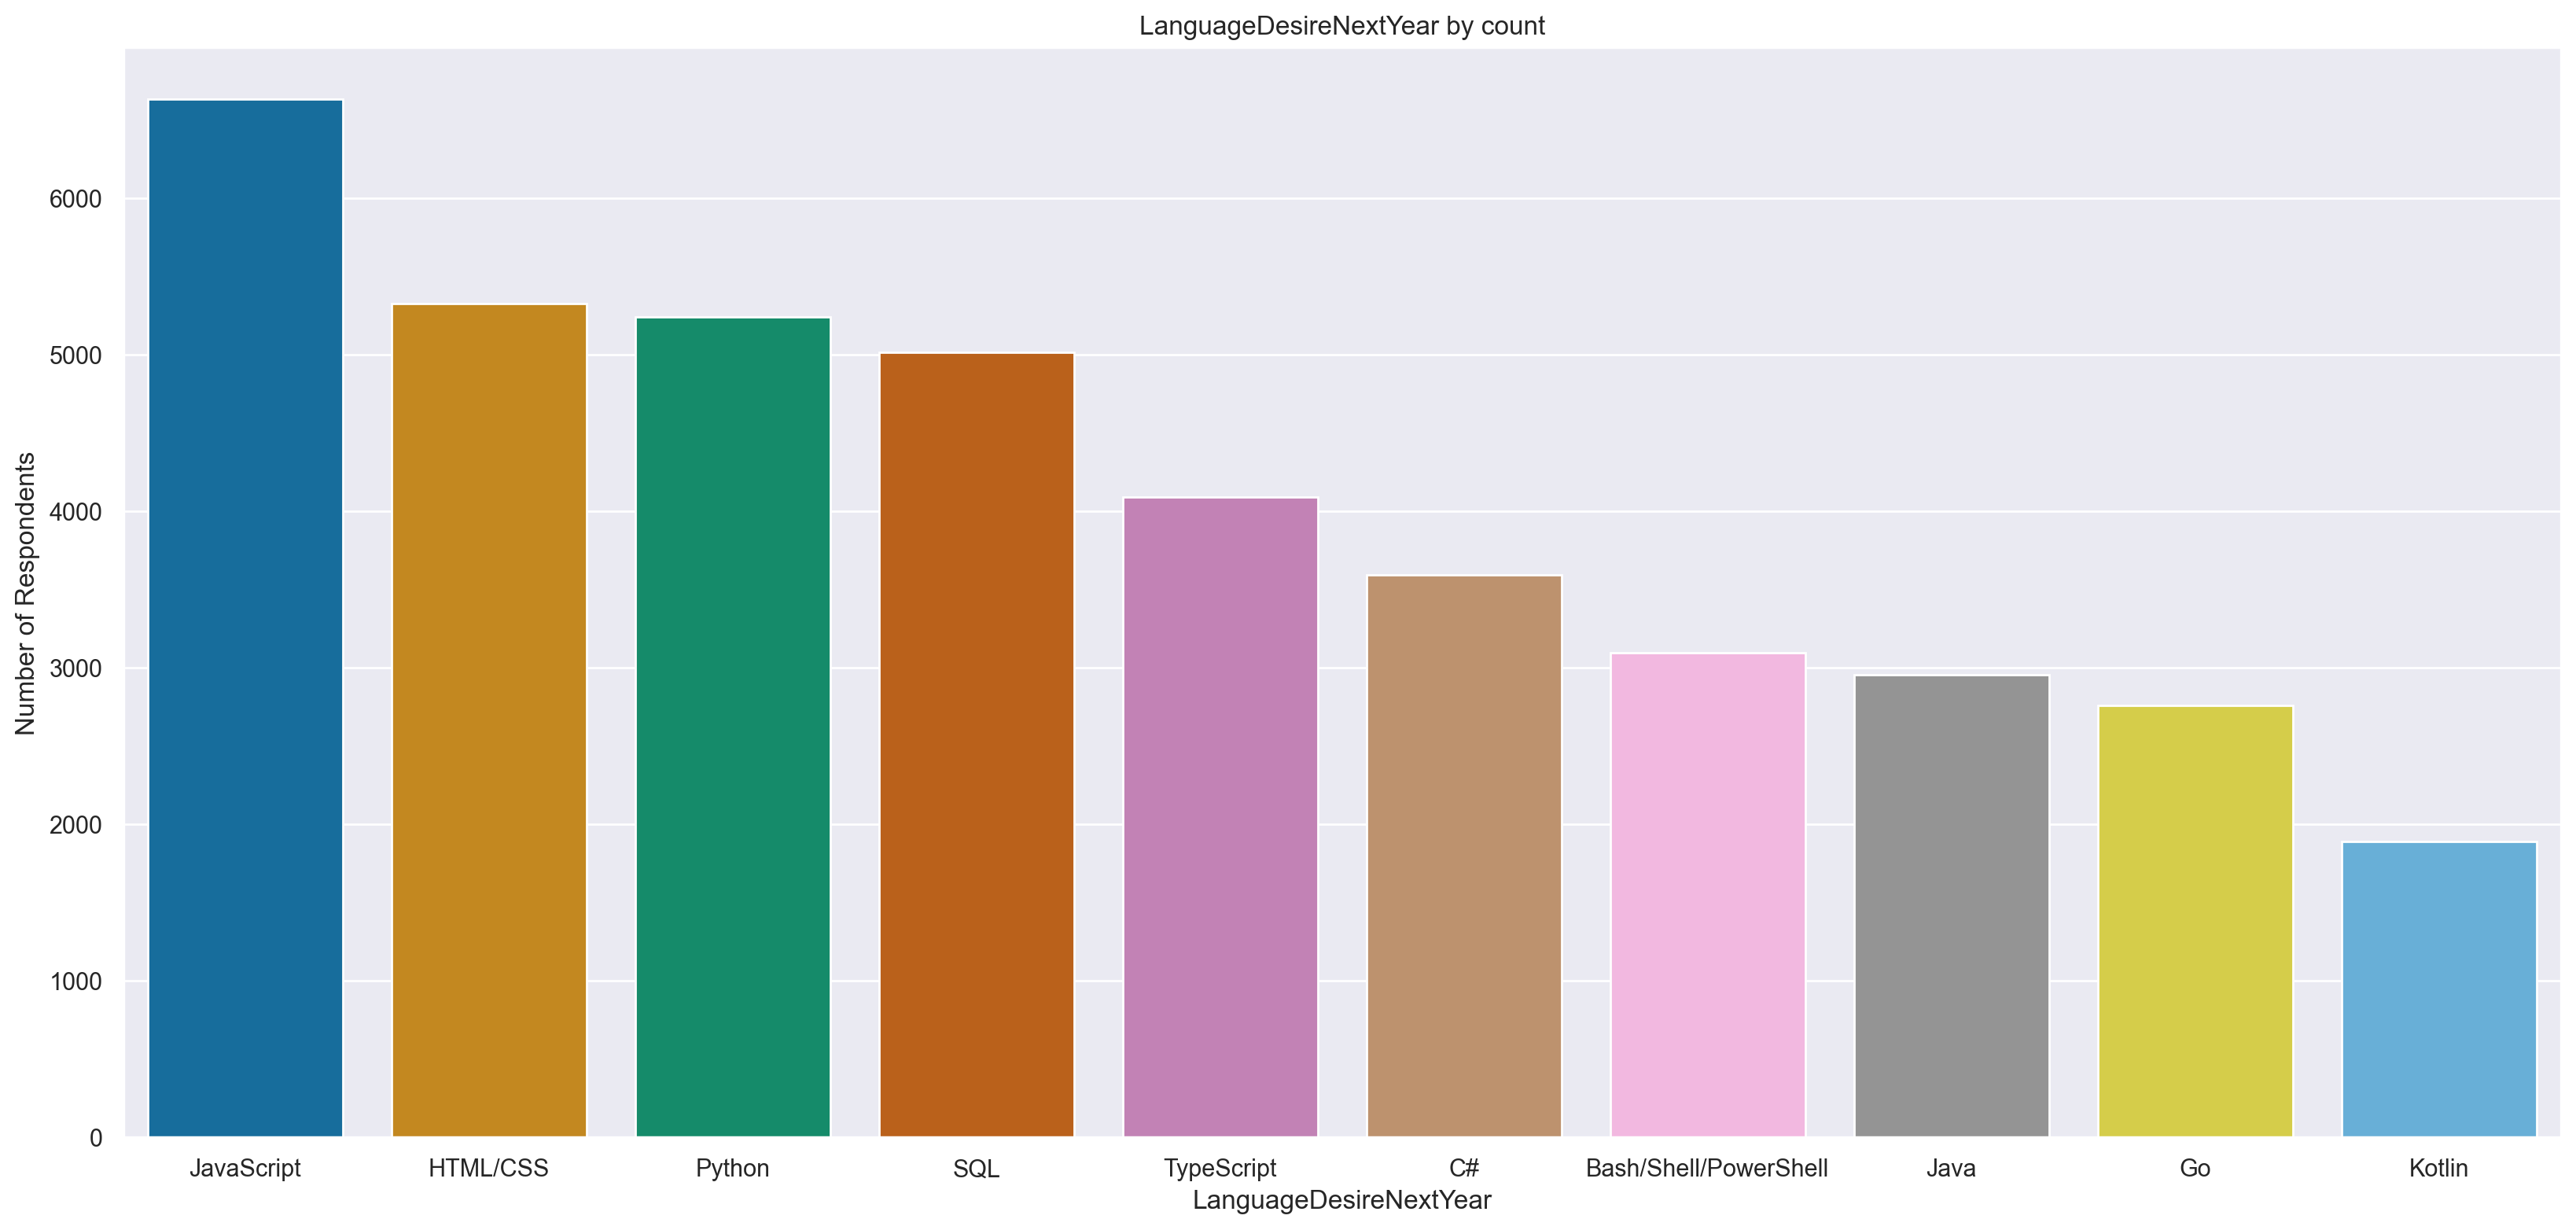

In [19]:
tablename = 'LanguageDesireNextYear'  # the table you wish to describe
xname = 'LanguageDesireNextYear'
yname = 'count'
sns.set()  # return to seaborn sns defaults
mypalette = 'colorblind'
plt.rcParams['figure.dpi'] = 200
plt.figure(figsize=(20,9))

doqueryplot()


  DatabaseDesireNextYear  count
0             PostgreSQL   4328
1                MongoDB   3649


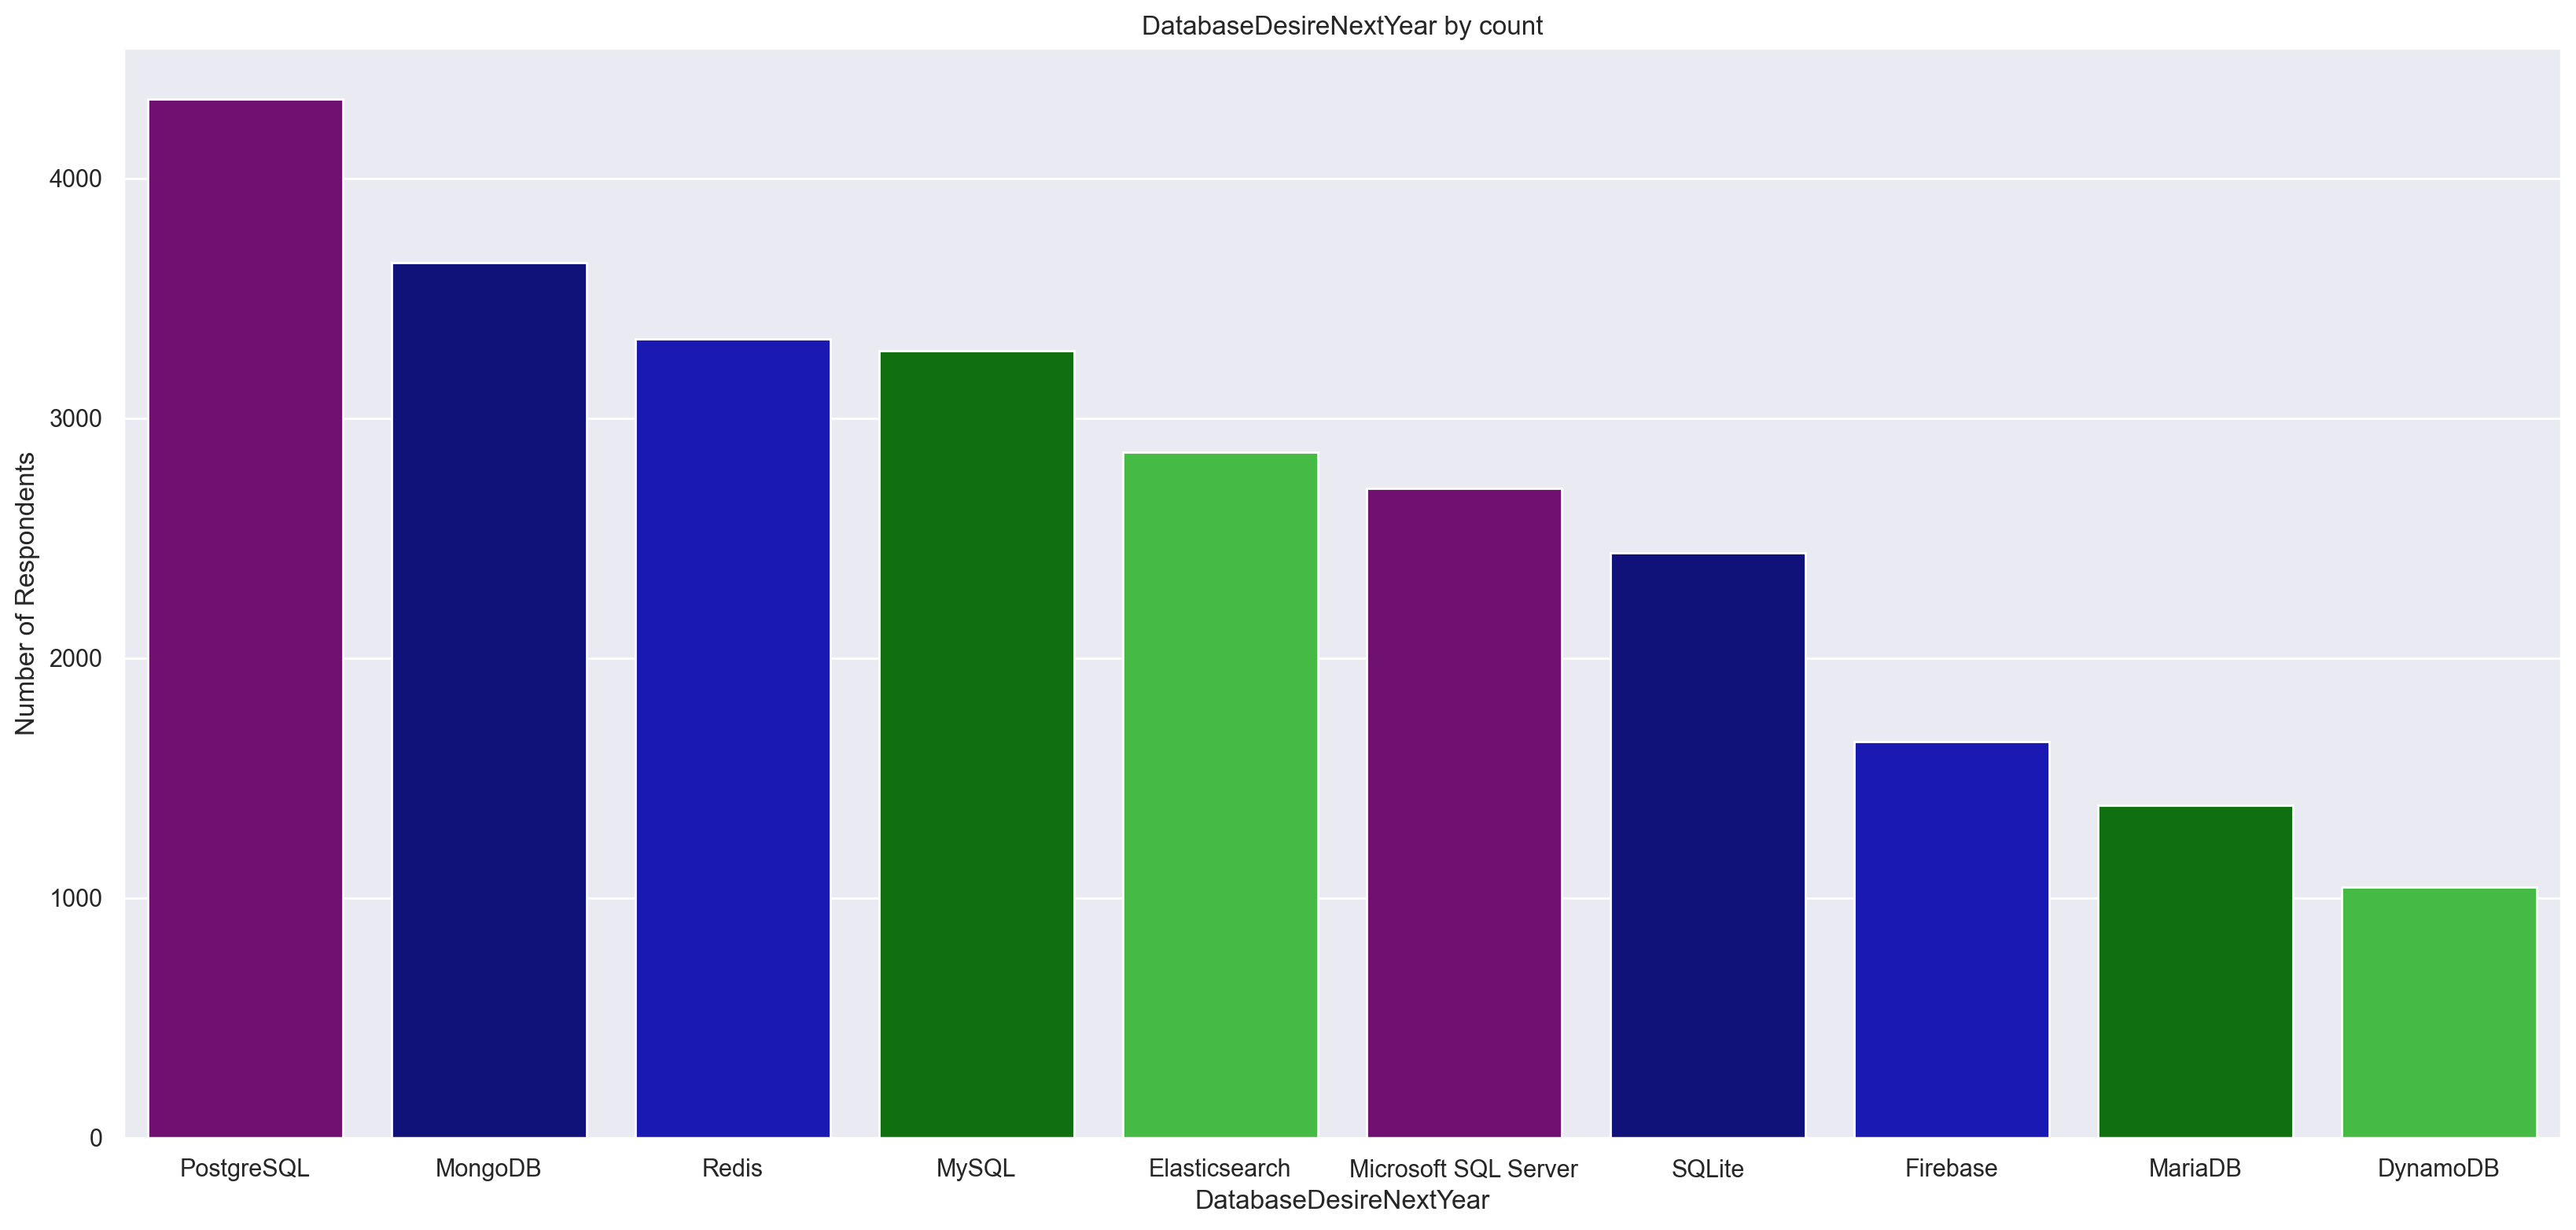

In [20]:
tablename = 'DatabaseDesireNextYear'  # the table you wish to describe
xname = 'DatabaseDesireNextYear'
yname = 'count'
sns.set()  # return to seaborn sns defaults
colorlist = ['purple','darkblue','mediumblue','green','limegreen','purple','darkblue','mediumblue','green','limegreen']
mypalette = colorlist
plt.rcParams['figure.dpi'] = 200
plt.figure(figsize=(20,9))

doqueryplot()


  PlatformDesireNextYear  count
0                  Linux   5865
1                 Docker   5804


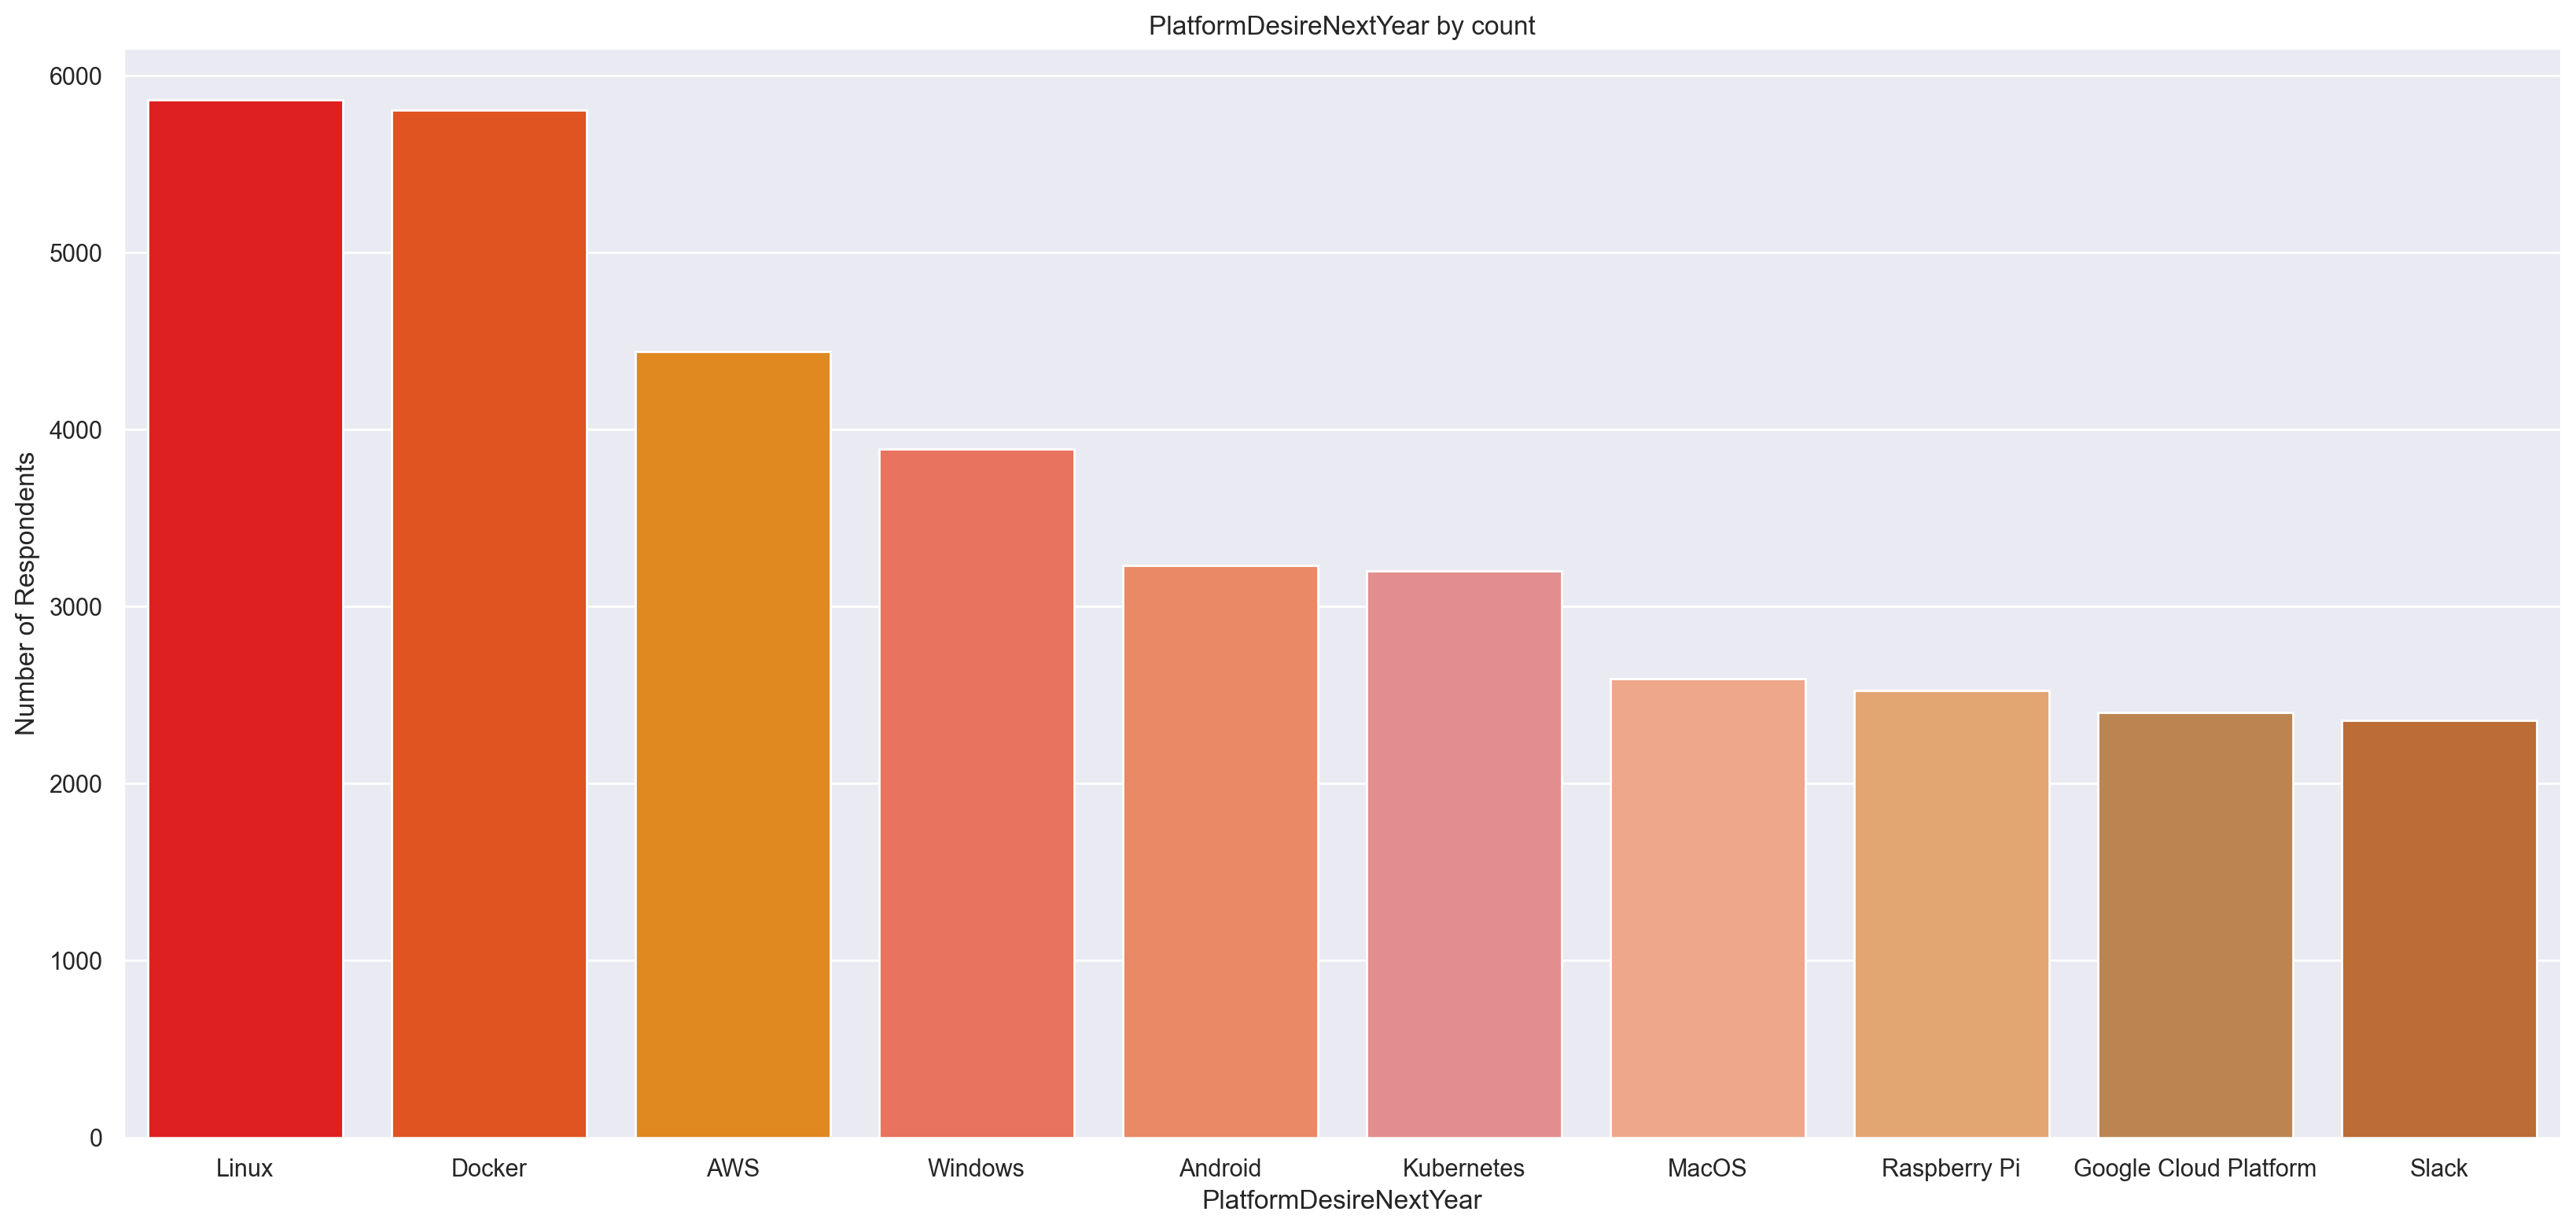

In [21]:
tablename = 'PlatformDesireNextYear'  # the table you wish to describe
xname = 'PlatformDesireNextYear'
yname = 'count'
sns.set()  # return to seaborn sns defaults
colorlist = ['red','orangered','darkorange','tomato','coral','lightcoral','lightsalmon','sandybrown','peru','chocolate']
mypalette = colorlist
plt.rcParams['figure.dpi'] = 200
plt.figure(figsize=(20,9))

doqueryplot()


  WebFrameDesireNextYear  count
0               React.js   4714
1                 Vue.js   3143


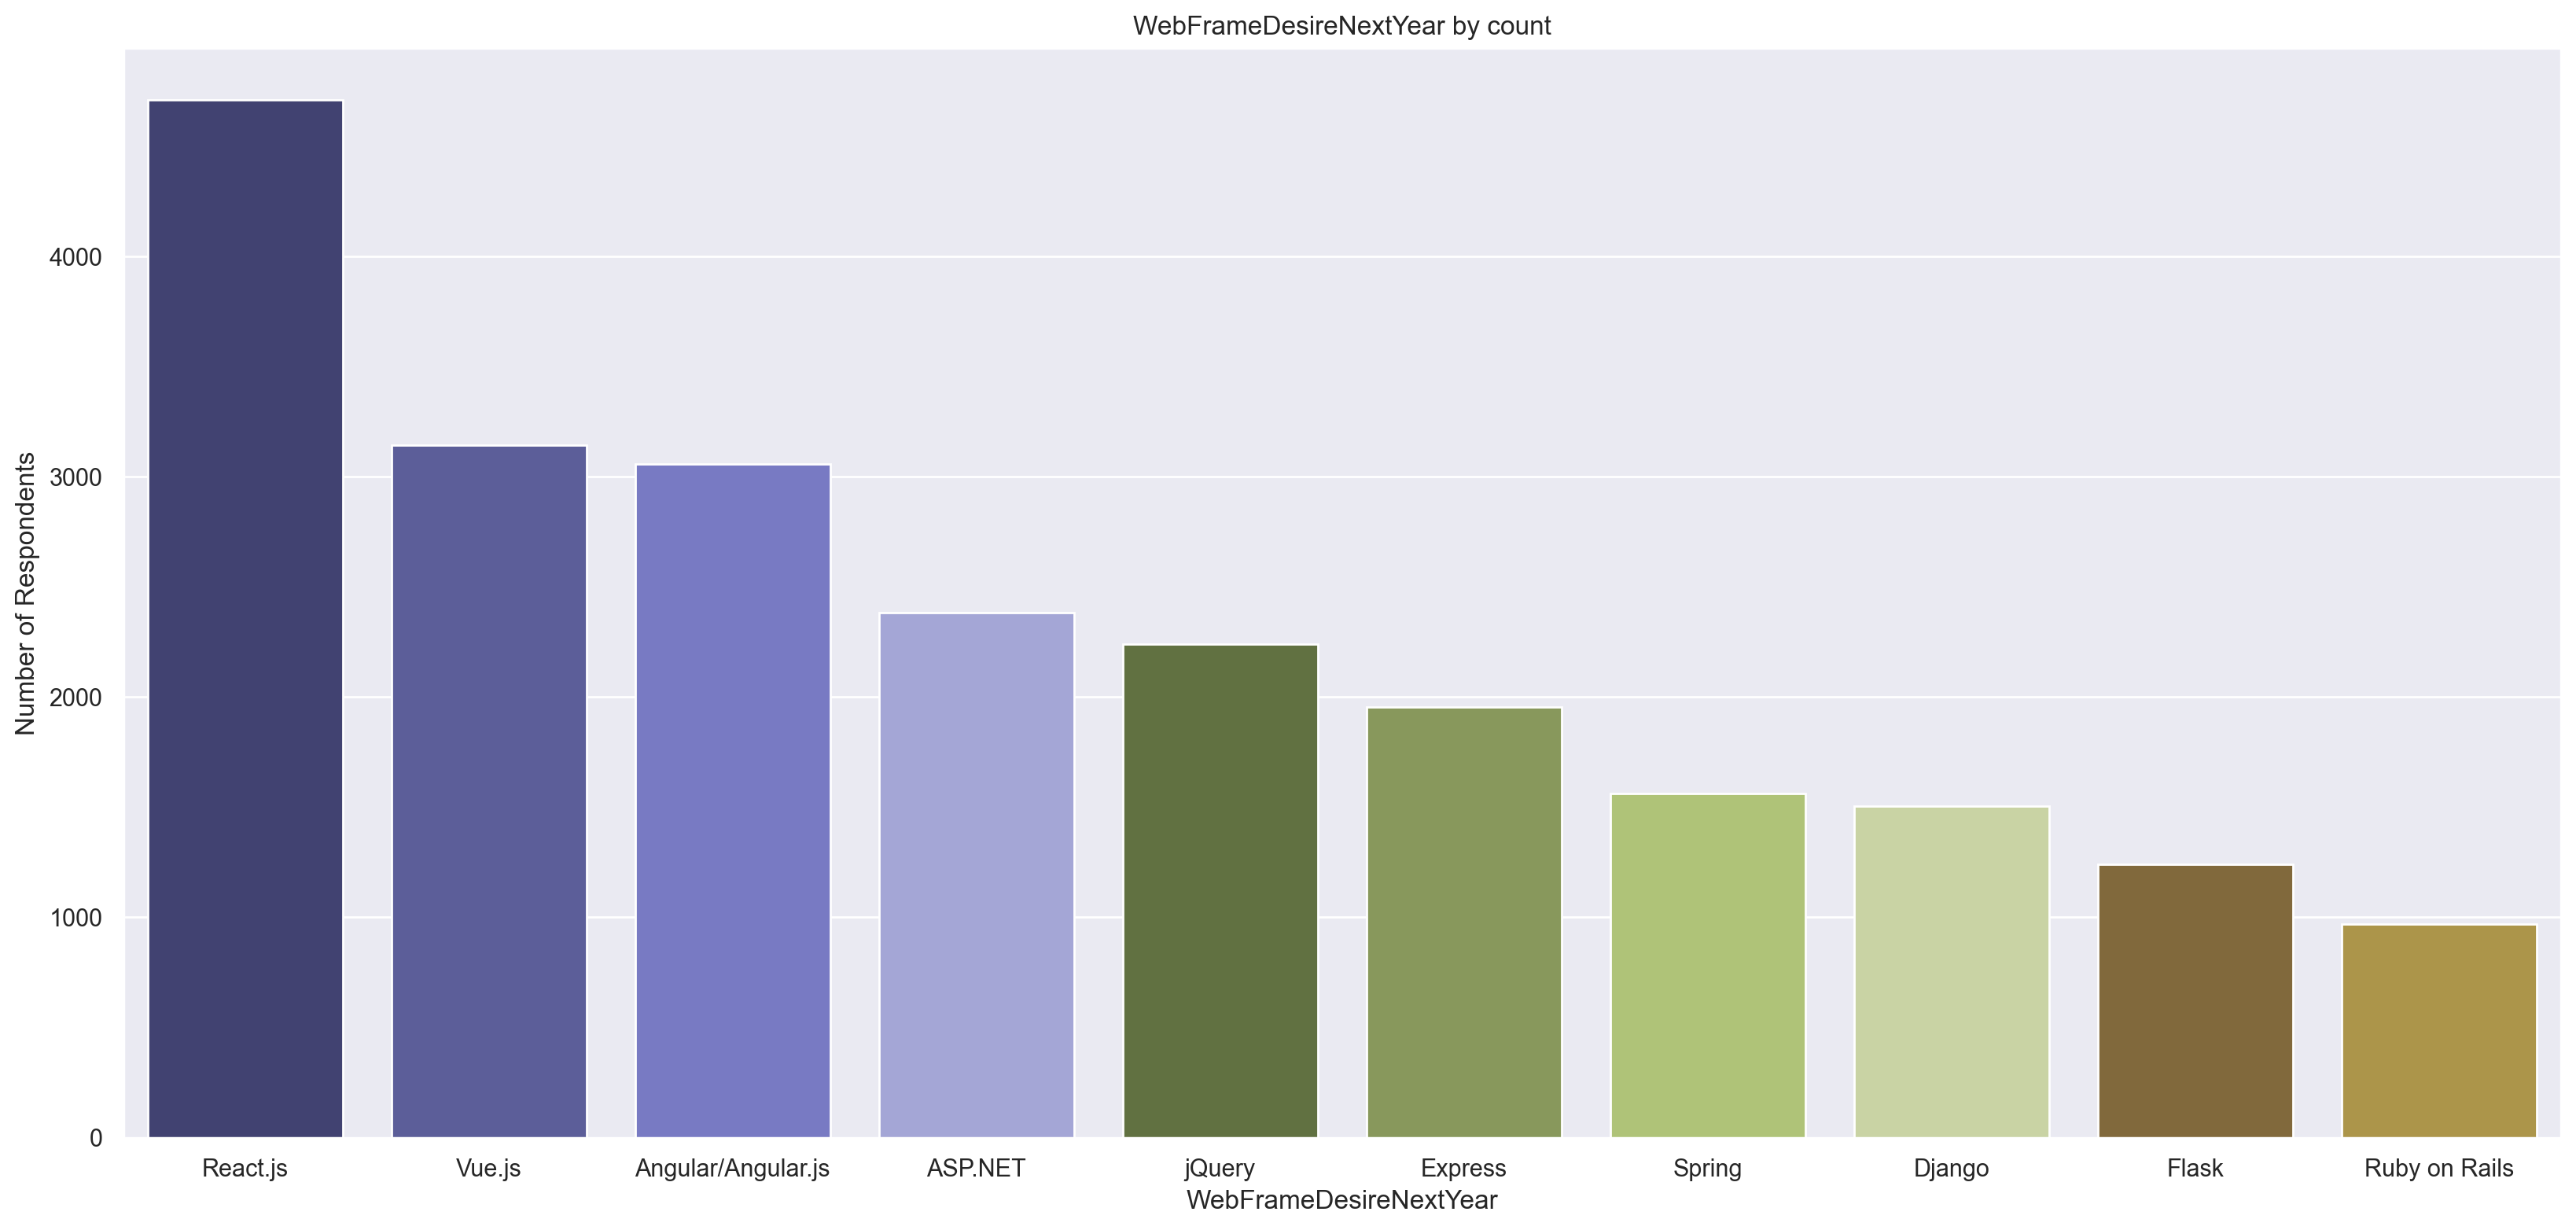

In [22]:
tablename = 'WebFrameDesireNextYear'  # the table you wish to describe
xname = 'WebFrameDesireNextYear'
yname = 'count'
sns.set()  # return to seaborn sns defaults
mypalette = 'tab20b'
plt.rcParams['figure.dpi'] = 200
plt.figure(figsize=(20,9))
doqueryplot()


In [15]:
### Now do Cognos Dashboard, using these code snippets
def doquerytbl():
    # Use float string with parameters, not straight variables
    # in order to avoid SQL injection attacks
    global dftab  # because it will be written instead of returned
    QUERY = f"select {xname}, count(*) as count FROM {tablename} group by {xname} order by {yname} desc"
    dft = pd.read_sql_query(QUERY, conn)
    dftab = dft.head(10)
    #print(dftab.head(2))  # when loops ok, return dftab
### This is needed for Cognos .csv files
QUERY = """
select Respondent, Age, ConvertedComp, count(*) as count
from master
group by Age
order by Age
"""
dftab = pd.read_sql_query(QUERY,conn)  # This is needed for Cognos
###


'''
### This is a test of doquerytab
tablename = 'DatabaseWorkedWith'  # the table you wish to describe
xname = 'DatabaseWorkedWith'
yname = 'count'
doquerytbl()
###
''';

def makedicts():
    global lenlist, dicofdfs, dicofcsvs
    path = os.getcwd()
    for tbl in sumlist:  # dfq was set by doquerytbl()
        # query, check length, save, it could be a little table or dict, sumlist as key and length as val
        # initialize a matrix with max length (10) counts = 0, max # columns
        # at end concatenate
        tablename = tbl
        xname = tbl
        yname = 'count'
        doquerytbl()  # it sets dbq later might return df
        tmpdf = dftab.copy()  # dftab with columns was set above
        # the whole df with columns xname and count is save in dict?
        dicofdfs[f"df{tbl}"] = tmpdf # then will be able to reference each table as dicofdfs["dftbl"]
        #print('\ntbl is ', tbl, ' len of its entry=', len(dicofdfs[f"df{tbl}"]) )
        lenlist.append(len(dicofdfs[f"df{tbl}"]))
        # now write the .csv file
        tmpdf.to_csv(os.path.join(path, f"df{tbl}.csv") , index=False, header=True)
        #print('\n dict param entry is\n', dicofdfs[f"df{tbl}"])


In [16]:
### Prepare for Cognos Dashboard - get small tables 
#      if needed, convert to columns in a dataframe with the final size
### Use list to get the summary tables
sumlist=['LanguageWorkedWith','DatabaseWorkedWith','PlatformWorkedWith','WebFrameWorkedWith',
         'LanguageDesireNextYear','DatabaseDesireNextYear','PlatformDesireNextYear','WebFrameDesireNextYear']
dicofdfs = {}
dicofcsvs = {}
lenlist = []
print("Please wait for files to be written")
makedicts()

print('max length of tables is ', max(lenlist), ' number of tables is ', len(lenlist));

'''
# This is to test makedicts()
df1= pd.DataFrame.from_dict(dicofdfs['dfDatabaseWorkedWith'], orient='columns')
#print('\ndf1 DBWW is \n', df1)
df2 = pd.DataFrame.from_dict(dicofdfs['dfLanguageWorkedWith'], orient='columns')
#print('\ndf2 LangWW is \n', df2)
''';
print("Files are written")


Please wait for files to be written
max length of tables is  10  number of tables is  8
Files are written


In [5]:
# Now write the simpler table with columns 
QUERY = """
SELECT Respondent, Age, Country, EdLevel, YearsCodePro
FROM master
"""
df = pd.read_sql_query(QUERY,conn)
print('shape of df is: ', df.shape)
#print('df is ', df.iat[0,0] )
#print(df.columns)
#print(df.head(3))

def is_not_number(value):  # copied from Google AI
    try:
        x = pd.to_numeric(value)  # or x = float(value)
        return False  # It's a number
    except (ValueError, TypeError):
        return True  # It's not a number
    except:
        return True  # It's not a number
 
#!pip install -U varname
from varname import argname

myDEBUG = True
def prd(debuggy):  # print data
    if myDEBUG == True:
        print('prd says: type of ', argname('debuggy'), ' is ', type(debuggy))
        print(argname('debuggy'), ' is ', debuggy, ' end of prd ', \
              argname('debuggy'), '\n')

# Clean up some numeric columns
agemean = df['Age'].mean().round(0)
agemed = df['Age'].median()
print(agemean, '  ', agemed)
# Below, coerce means non-numerics replaced by NaN
# DF can skip them when calculating mean, etc, but can Cognos?
df['Age'] = pd.to_numeric(df['Age'],errors='coerce').fillna(agemean)
df['Age'] = df['Age'].astype('float').round(1)
# ignore will leave objects as they were but convert others
# df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'],errors='ignore').astype('float')
# but this will be deprecated so that if this were really necessary,
# I would need to look at each value in a for loop


# It seems reasonable to replace less than a year with 0.5
# but first, count them
count = df[df['YearsCodePro'] == 'Less than 1 year'].count().reset_index()
#print(f"{count=}")
prd(count)

# But are there other text answers?  See next cell


shape of df is:  (11398, 5)
31.0    29.0
prd says: type of  count  is  <class 'pandas.core.frame.DataFrame'>
count  is            index    0
0    Respondent  486
1           Age  486
2       Country  486
3       EdLevel  481
4  YearsCodePro  486  end of prd  count 



In [7]:
# Look for other text values in 'YearsCodePro'

dfgrp = df.copy()  # or dfgrp = df.loc[:,:]
dfgrp['YCPCount'] = 0  # create and init the new column

#print(dfgrp.columns, '\n', dfgrp.dtypes)  # the new column is there
dfgrp = dfgrp.groupby('YearsCodePro')['YCPCount'].count().to_frame()
dfgrp = dfgrp.reset_index()
colnbr = dfgrp.columns.get_loc('YearsCodePro')  
print('dfgrp shape is ', dfgrp.shape)

#MAXROWS = 100000  # for testing, but it only has rows for range of ages, not all respondents
#dfgrp.truncate(after=(MAXROWS-1),axis=0)  # for testing, but not working
#print('shape after truncate: ', dfgrp.shape)
#print(dfgrp.columns, '\n', dfgrp.dtypes)  # the new column is there
#print('dfgrp columns are: ', dfgrp.columns)
#print(dfgrp.head())

for row in range(0, dfgrp.shape[0]):  # don't print numbers, just text
    if is_not_number(dfgrp.iloc[row, colnbr]) == True:
        print(dfgrp.iloc[row, :] )

dfg = dfgrp.groupby('YearsCodePro',as_index=False)[['YCPCount']].count()
colnbr = dfg.columns.get_loc('YearsCodePro')

print(dfg.shape)
for row in range(0, dfg.shape[0]):  # don't print numbers, just text
    # print('row=', row, ' value=', dfg.iloc[row, colnbr])
    if is_not_number(dfg.iloc[row, colnbr]) == True:
        print('for loop: row=', row, ' value of non-numeric cell is ', dfgrp.iloc[row, :] )

### No, that is the only text one, now change it to 0.5 in the full df
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')  # standardize obj to NaN
df['YearsCodePro'] = df['YearsCodePro'].fillna(0.5)
print('df shape is ', df.shape)
# Write single .csv file with 5 columns, so Cognos can do calculations
fpfn=os.path.join(os.getcwd(), 'AgeEdLoc.csv')
df.to_csv(fpfn, header=True, index=False)


dfgrp shape is  (47, 2)
YearsCodePro    Less than 1 year
YCPCount                     486
Name: 46, dtype: object
(47, 2)
for loop: row= 46  value of non-numeric cell is  YearsCodePro    Less than 1 year
YCPCount                     486
Name: 46, dtype: object
df shape is  (11398, 5)


<!--|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|>


Copyright © IBM Corporation. All rights reserved.


In [2]:
%whos

Interactive namespace is empty.
